# Single-blind test of airplane-based hyperspectral methane detection via controlled
Analysis and graphs in the Supplementary Information.\
Note: This Jupyter Notebook is customized for use in Google Colab. 
- To run the code in Google Colab, unzip the cloned file, upload the file onto Google Drive, and specify the root_path in the first cell below.
- To run the code locally, please revise the first cell below

In [0]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Google Drive where you have saved the unzipped 'github_version' folder containing the 'functions' folder.
# e.g. root_path = 'Controlled_Methane_Release_Stanford_Kairos_Oct_2019/' + folder_name

folder_name = 'github_version/'
root_path = None
assert root_path is not None, "[!] Enter directory."

%cd drive/My\ Drive
%cp -r $root_path ../../
%cd ../../

# setup

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 5) # set default size of plots

# auto-reload external Python modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# ignore some warnings
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
# directory for storing graphs generated
import os
graph_dir = os.path.join('drive/My Drive/', root_path)+'graphs_SI/'

from datetime import date
today = date.today()
fdate = date.today().strftime('%m%d%Y')    # append the data today when exporting the graphs

# load data

In [0]:
data = pd.read_excel('drive/My Drive/'+root_path+'Stanford_Kairos_controlled_release_2019_studyData.xlsx',sheet_name='DATA',skiprows=1)
# data.info()

## adjust methane release rate based on gas composition

Methane release rate is methane_vol% * total natural gas release rate

The average methane content from November 4- December 5 was 93.5% in the two BTU areas closest to Yolo/Sacramento where the gas was filled (downstream of the filling stations). The BTU areas are H09 and X01.
https://www.pge.com/pipeline/operations/gas_quality/index.page
BTU areas come from a map from PG&E's 2017 filing of FERC Form 2. The map is not in their most recent 2018 filing.

In [0]:
from github_version.functions.data_processing import convert_to_CH4_rate
CH4_vol_fraction = 0.935
data = convert_to_CH4_rate(data,CH4_vol_fraction)

## convert from US/Imperial to Metric

ref: molar weight of CH4 and number of moles in a standard cubic feet taken from the Gas Processes Association Handbook section 1 page 1-8 \

CH4_density = (1000 scf/mcf) / (23.645 std m3/kmol) / (35.38 scf/std m3) * (16.043 kg/kmol) =  19.177 kg/mcf

Note: 1 scf is defined as a standard cubic feet at 14.696 psia = 1 atm and 15 degC

In [0]:
from github_version.functions.data_processing import convert_to_metric

# CH4_density[kg/mcf] under 15 deg C and 1 atm
CH4_density = 1000/23.645/35.38 * 16.043       # kg/mcf
data = convert_to_metric(data,CH4_density)

## exclude invalid data points
Based on sensitivity cases (base case presented in the manuscript) and wind speed data. Note that the ultrasonic anemometer was not available on 10/8/2019. Consequently, the Kairos quantification in (kg/h)/(m/s) cannot be multiplied with the concurrent wind speed measured by the ultrasonic anemometer on that day; hence reducing the number of valid data points if ultrasonic anemoemter is chosen.

In [0]:
from github_version.functions.data_processing import data_selection

# detection threshold
Detection threshold in (kg/d)/(m/s) is determined with binned data

In [0]:
from github_version.functions.min_detection import detection_rate_by_bin
from github_version.functions.min_detection import detection_rate_bin_plot

In [0]:
n_bins=7
threshold=35

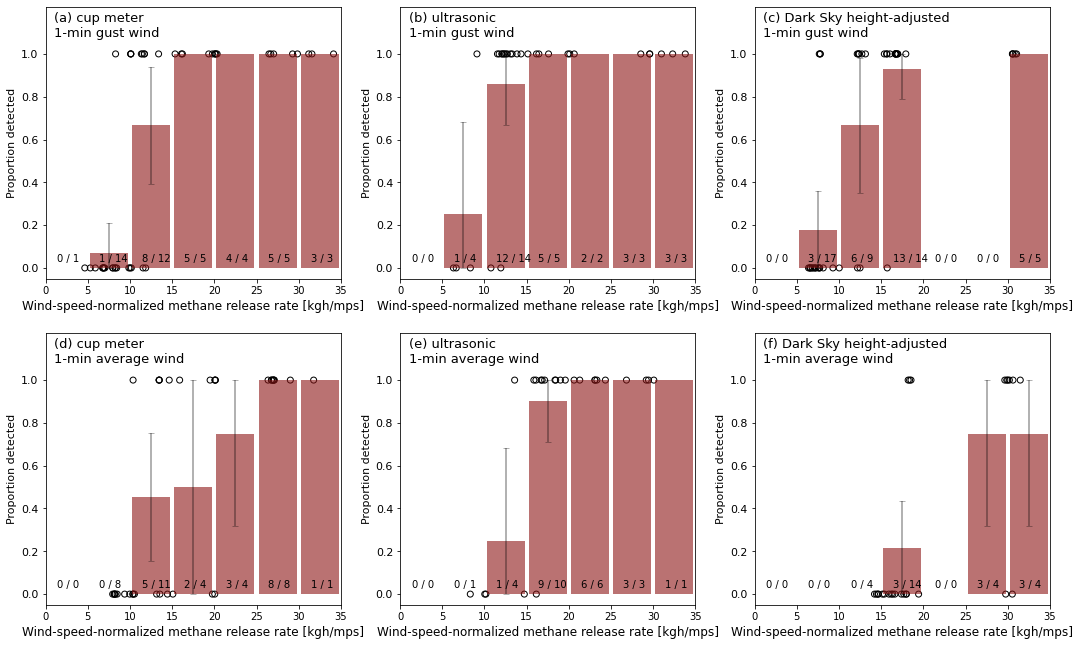

In [0]:
# fig,[ax1,ax2] = plt.subplots(1,2,figsize=[13,5.5])
# fig,[[ax1,ax2],[ax4,ax5]] = plt.subplots(2,2,figsize=[13,12.5])
fig,[[ax1,ax2,ax3],[ax4,ax5,ax6]] = plt.subplots(2,3,figsize=[18,11])
detection_rate_bin_plot(ax1,data_selection(data,'Base','WS_windGust_logged_mps'),n_bins,threshold)
detection_rate_bin_plot(ax2,data_selection(data,'Base','sonic_windGust_mps'),n_bins,threshold)
detection_rate_bin_plot(ax3,data_selection(data,'Base','darksky_windGust_mps'),n_bins,threshold)
detection_rate_bin_plot(ax4,data_selection(data,'Base','WS_windSpeed_mps'),n_bins,threshold)
detection_rate_bin_plot(ax5,data_selection(data,'Base','sonic_windSpeed_mps'),n_bins,threshold)
detection_rate_bin_plot(ax6,data_selection(data,'Base','darksky_windSpeed_mps'),n_bins,threshold)
ax1.annotate('(a) cup meter\n1-min gust wind',xy=(0.03,0.89),xycoords = 'axes fraction',fontsize=13)
ax2.annotate('(b) ultrasonic\n1-min gust wind',xy=(0.03,0.89),xycoords = 'axes fraction',fontsize=13)
ax3.annotate('(c) Dark Sky height-adjusted\n1-min gust wind',xy=(0.03,0.89),xycoords = 'axes fraction',fontsize=13)
ax4.annotate('(d) cup meter\n1-min average wind',xy=(0.03,0.89),xycoords = 'axes fraction',fontsize=13)
ax5.annotate('(e) ultrasonic\n1-min average wind',xy=(0.03,0.89),xycoords = 'axes fraction',fontsize=13)
ax6.annotate('(f) Dark Sky height-adjusted\n1-min average wind',xy=(0.03,0.89),xycoords = 'axes fraction',fontsize=13)
fig

In [0]:
# save fig
fig.savefig(graph_dir+'KairosDetectionThresholdAllWind7Bins'+fdate+'.pdf',format='pdf')

## by wind speed

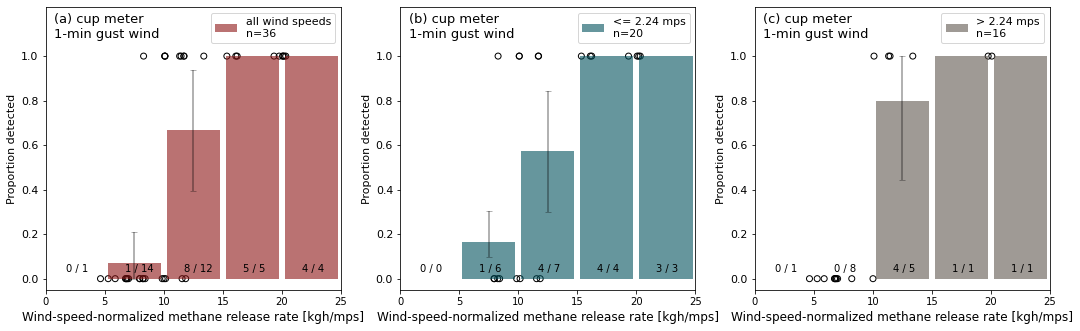

In [0]:
from github_version.functions.min_detection import detection_rate_bin_plot_by_wind_speed

n_bins=5
threshold=25

fig,[ax1,ax2,ax3] = plt.subplots(1,3,figsize=[18,5.2])
wind_to_use = "WS_windGust_logged_mps"
ax1,ax2,ax3 = detection_rate_bin_plot_by_wind_speed(ax1,ax2,ax3, 
                                                    data_selection(data,'Base',wind_to_use), 
                                                    n_bins, threshold,wind_to_use)
ax1.annotate('(a) cup meter\n1-min gust wind',xy=(0.03,0.89),xycoords = 'axes fraction',fontsize=13)
ax2.annotate('(b) cup meter\n1-min gust wind',xy=(0.03,0.89),xycoords = 'axes fraction',fontsize=13)
ax3.annotate('(c) cup meter\n1-min gust wind',xy=(0.03,0.89),xycoords = 'axes fraction',fontsize=13)
fig

In [0]:
# save fig
fig.savefig(graph_dir+'KairosDetectionThresholdByWindSpeed'+fdate+'.pdf',format='pdf')

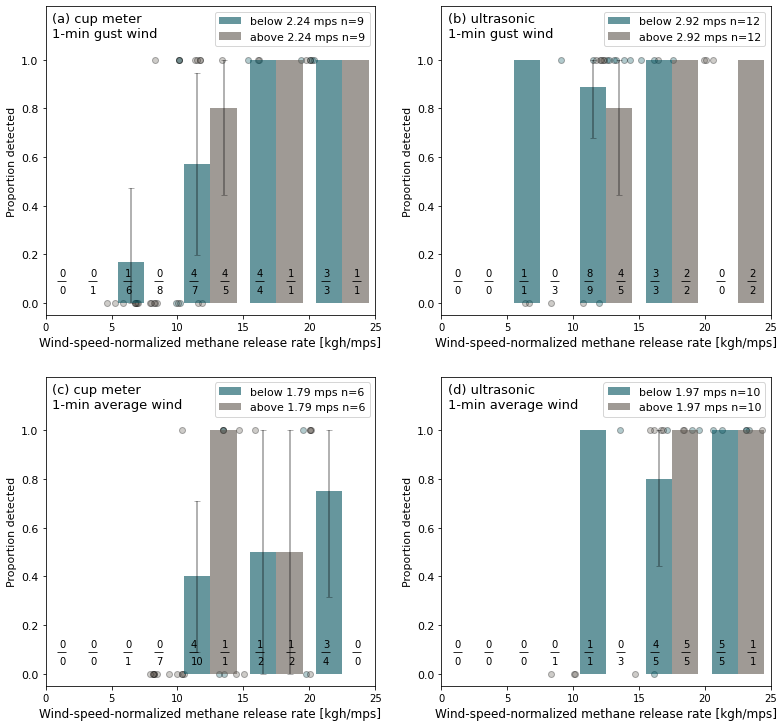

In [0]:
by_wind_speed = 1
# fig,[ax1,ax2] = plt.subplots(1,2,figsize=[13,5.5])
fig,[[ax1,ax2],[ax4,ax5]] = plt.subplots(2,2,figsize=[13,12.5])
# fig,[[ax1,ax2,ax3],[ax4,ax5,ax6]] = plt.subplots(2,3,figsize=[18,11])
detection_rate_bin_plot(ax1,data_selection(data,'Base','WS_windGust_logged_mps'),n_bins,threshold,
                                           by_wind_speed,wind_to_use='WS_windGust_logged_mps')
detection_rate_bin_plot(ax2,data_selection(data,'Base','sonic_windGust_mps'),n_bins,threshold,
                                          by_wind_speed,wind_to_use='sonic_windGust_mps')
# detection_rate_bin_plot(ax3,data_selection(data,'Base','darksky_windGust_mps'),n_bins,threshold,
#                                           by_wind_speed,wind_to_use='darksky_windGust_mps')
detection_rate_bin_plot(ax4,data_selection(data,'Base','WS_windSpeed_mps'),n_bins,threshold,
                                           by_wind_speed,wind_to_use='WS_windSpeed_mps')
detection_rate_bin_plot(ax5,data_selection(data,'Base','sonic_windSpeed_mps'),n_bins,threshold,
                                          by_wind_speed,wind_to_use='sonic_windSpeed_mps')
# detection_rate_bin_plot(ax6,data_selection(data,'Base','darksky_windSpeed_mps'),n_bins,threshold,
#                                           by_wind_speed,wind_to_use='darksky_windSpeed_mps')
ax1.annotate('(a) cup meter \n1-min gust wind',xy=(0.02,0.9),xycoords = 'axes fraction',fontsize=13)
ax2.annotate('(b) ultrasonic \n1-min gust wind',xy=(0.02,0.9),xycoords = 'axes fraction',fontsize=13)
# ax3.annotate('() Dark Sky\n1-min gust wind',xy=(0.02,0.9),xycoords = 'axes fraction',fontsize=13)
ax4.annotate('(c) cup meter\n1-min average wind',xy=(0.02,0.9),xycoords = 'axes fraction',fontsize=13)
ax5.annotate('(d) ultrasonic\n1-min average wind',xy=(0.02,0.9),xycoords = 'axes fraction',fontsize=13)
# ax6.annotate('() Dark Sky\n1-min average wind',xy=(0.02,0.9),xycoords = 'axes fraction',fontsize=13)

fig

In [0]:
# save fig
fig.savefig(graph_dir+'KairosDetectionThresholdByWindSpeed'+fdate+'.pdf',format='pdf')

# parity chart

## ordinary linear regression

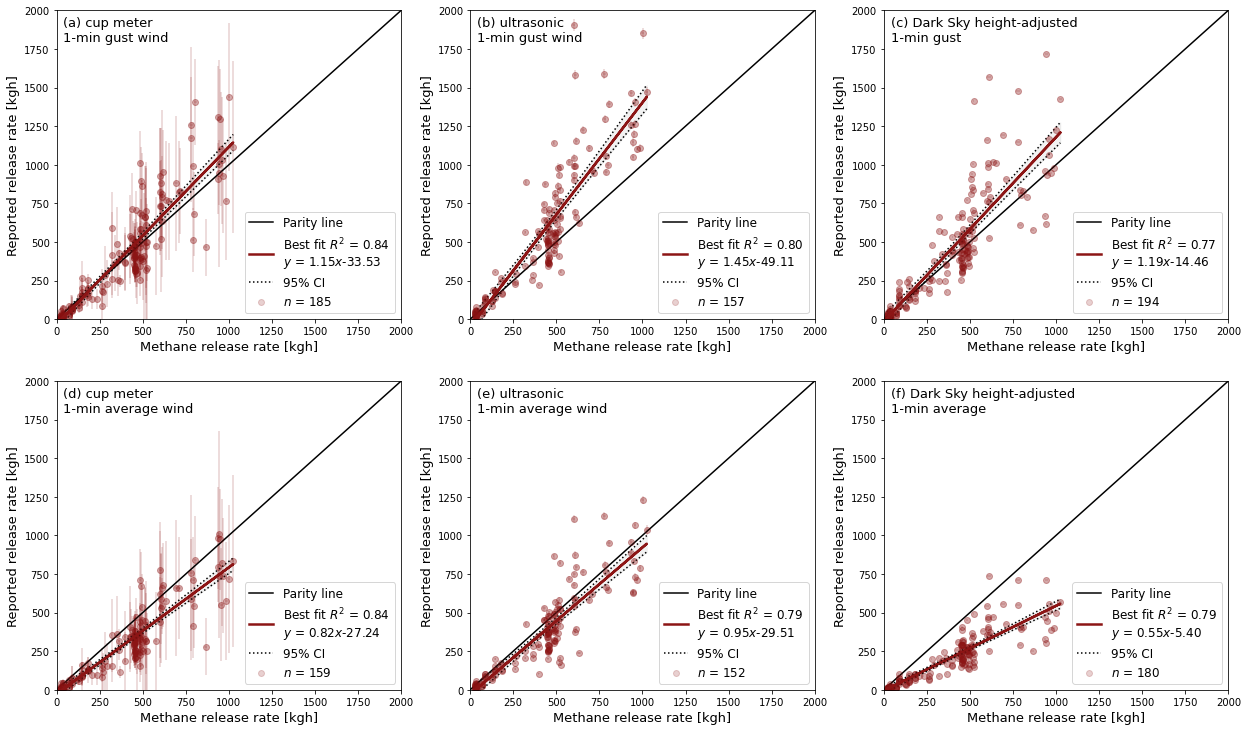

In [0]:
from github_version.functions.parity import *

# fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13.5,6])
# fig,[[ax1,ax2],[ax4,ax5]] = plt.subplots(2,2,figsize=[13,12.5])
# fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=[21,6])
fig,[[ax1,ax2,ax3],[ax4,ax5,ax6]] = plt.subplots(2,3,figsize=[21,12.5])
ax1 = parity_plot(ax1, data_selection(data,'Base','WS_windGust_logged_mps'))
ax2 = parity_plot(ax2, data_selection(data,'Base','sonic_windGust_mps'))
ax3 = parity_plot(ax3, data_selection(data,'Base','darksky_windGust_mps'))
ax4 = parity_plot(ax4, data_selection(data,'Base','WS_windSpeed_mps'))
ax5 = parity_plot(ax5, data_selection(data,'Base','sonic_windSpeed_mps'))
ax6 = parity_plot(ax6, data_selection(data,'Base','darksky_windSpeed_mps'))
ax1.annotate('(a) cup meter \n1-min gust wind',xy=[0.02,0.9],xycoords='axes fraction',fontsize=13)
ax2.annotate('(b) ultrasonic \n1-min gust wind',xy=[0.02,0.9],xycoords='axes fraction',fontsize=13)
ax3.annotate('(c) Dark Sky height-adjusted \n1-min gust',xy=[0.02,0.9],xycoords='axes fraction',fontsize=13)
ax4.annotate('(d) cup meter \n1-min average wind',xy=[0.02,0.9],xycoords='axes fraction',fontsize=13)
ax5.annotate('(e) ultrasonic \n1-min average wind',xy=[0.02,0.9],xycoords='axes fraction',fontsize=13)
ax6.annotate('(f) Dark Sky height-adjusted \n1-min average',xy=[0.02,0.9],xycoords='axes fraction',fontsize=13)
fig

In [0]:
# save fig
fig.savefig(graph_dir+'KairosDetectionParityAllWind'+fdate+'.pdf',format='pdf')

## force zero intercept

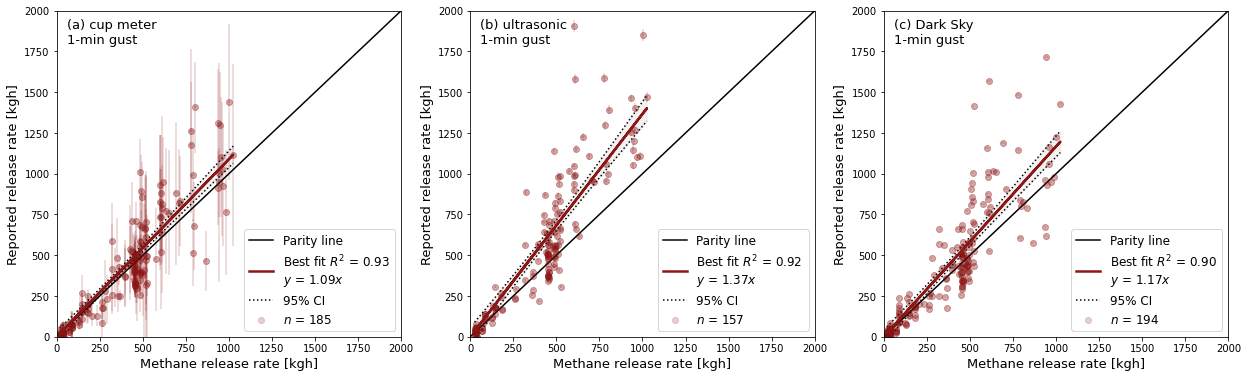

In [0]:
# fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13.5,6])
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=[21,6])
ax1 = parity_plot(ax1, data_selection(data,'Base','WS_windGust_logged_mps'),force_intercept_origin=1)
ax2 = parity_plot(ax2, data_selection(data,'Base','sonic_windGust_mps'),force_intercept_origin=1)
ax3 = parity_plot(ax3, data_selection(data,'Base','darksky_windGust_mps'),force_intercept_origin=1)
ax1.annotate('(a) cup meter \n1-min gust',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
ax2.annotate('(b) ultrasonic \n1-min gust',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
ax3.annotate('(c) Dark Sky \n1-min gust',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
fig

In [0]:
# save fig
fig.savefig(graph_dir+'KairosDetectionParityZeroIntercept'+fdate+'.pdf',format='pdf')

## data collected on different days

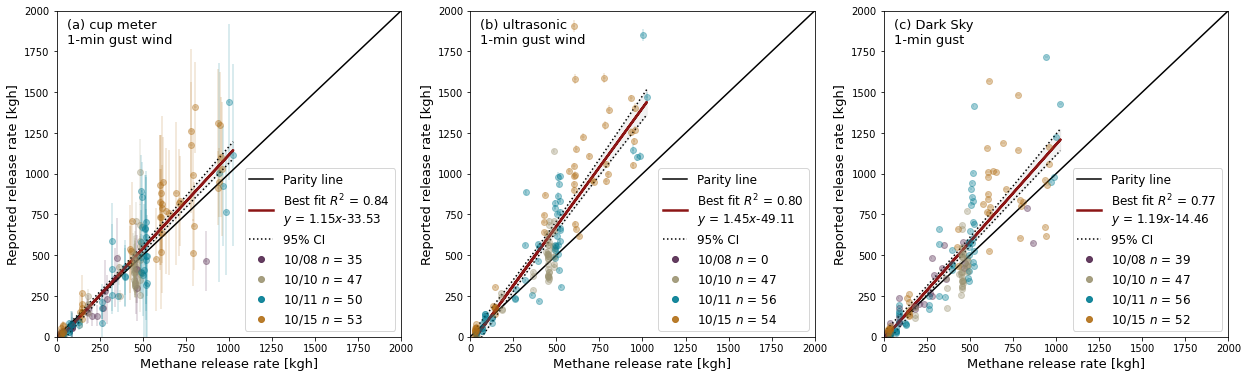

In [0]:
from github_version.functions.parity import parity_plot_days_colored

# fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13.5,6])
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=[21,6])
ax1 = parity_plot_days_colored(ax1, data_selection(data,'Base','WS_windGust_logged_mps'))
ax2 = parity_plot_days_colored(ax2, data_selection(data,'Base','sonic_windGust_mps'))
ax3 = parity_plot_days_colored(ax3, data_selection(data,'Base','darksky_windGust_mps'))
ax1.annotate('(a) cup meter \n1-min gust wind',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
ax2.annotate('(b) ultrasonic \n1-min gust wind',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
ax3.annotate('(c) Dark Sky \n1-min gust',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
fig

In [0]:
# save fig
fig.savefig(graph_dir+'KairosDetectionParityDaysColored'+fdate+'.pdf',format='pdf')

# sensitivity

## exclusion criteria

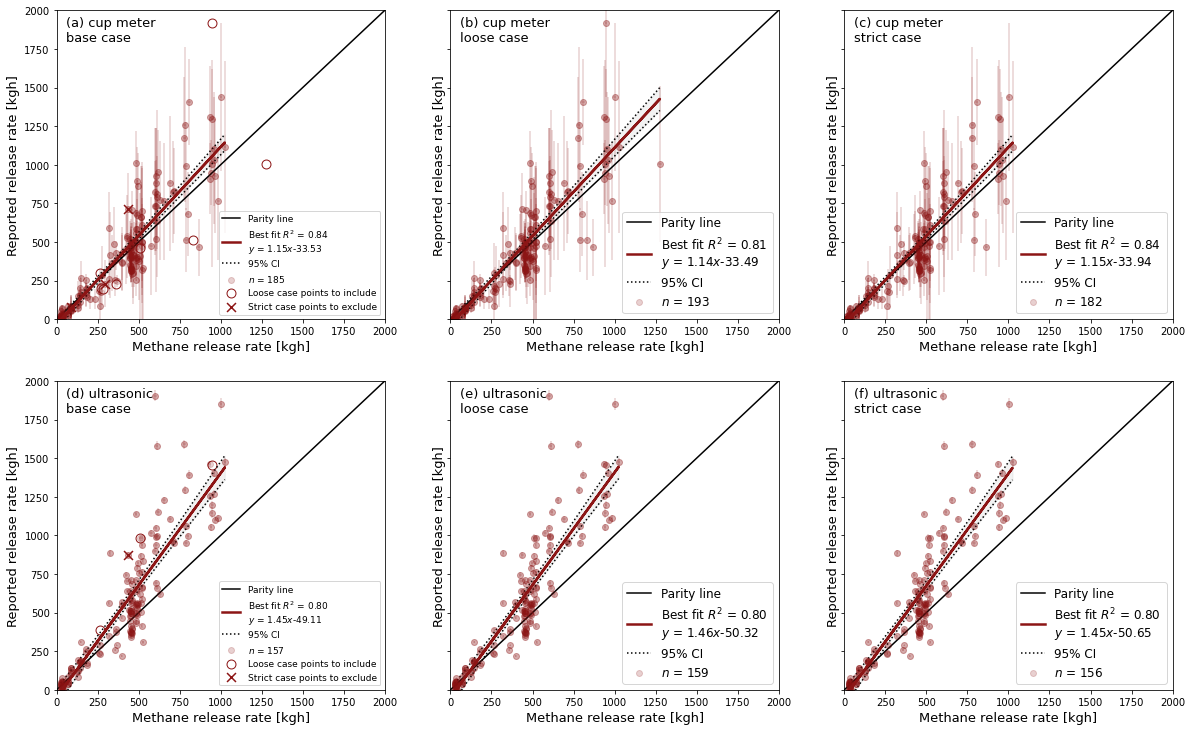

In [0]:
fig, ([[ax1,ax2,ax3],[ax4,ax5,ax6]]) = plt.subplots(2,3,figsize=[20,12.5],sharey=True)
ax1 = parity_plot(ax1, data_selection(data,'Base','WS_windGust_logged_mps'))
ax2 = parity_plot(ax2, data_selection(data,'Loose','WS_windGust_logged_mps'))
ax3 = parity_plot(ax3, data_selection(data,'Strict','WS_windGust_logged_mps'))
ax4 = parity_plot(ax4, data_selection(data,'Base','sonic_windGust_mps'))
ax5 = parity_plot(ax5, data_selection(data,'Loose','sonic_windGust_mps'))
ax6 = parity_plot(ax6, data_selection(data,'Strict','sonic_windGust_mps'))

# mark the loose case data to include for cup meter
wind_to_use = 'WS_windGust_logged_mps'
plot_data = data_selection(data,'Loose',wind_to_use)
x = plot_data[plot_data.closest_plume_not_fully_developed_WS!=0].CH4_release_kgh
y = plot_data[plot_data.closest_plume_not_fully_developed_WS!=0].closest_plume_quantification_kgh.fillna(0)
ax1.scatter(x,y,s=80,edgecolor='#8c1515',facecolor='white',label='Loose case points to include')
# mark the strict case data to exclude for cup meter
x = plot_data[plot_data.blowoff_noticed_right_after_flow_rate_turned_down==1].loc[plot_data.closest_plume_not_fully_developed_sonic==0].CH4_release_kgh
y = plot_data[plot_data.blowoff_noticed_right_after_flow_rate_turned_down==1].loc[plot_data.closest_plume_not_fully_developed_sonic==0].closest_plume_quantification_kgh.fillna(0)
ax1.scatter(x,y,s=80,color='#8c1515',marker='x',label='Strict case points to exclude')

# mark the loose case data to include for the ultrasonic anemometer
wind_to_use = 'sonic_windGust_mps'
plot_data = data_selection(data,'Loose',wind_to_use)
x = plot_data[plot_data.closest_plume_not_fully_developed_WS!=0].CH4_release_kgh
y = plot_data[plot_data.closest_plume_not_fully_developed_WS!=0].closest_plume_quantification_kgh.fillna(0)
ax4.scatter(x,y,s=80,edgecolor='#8c1515',facecolor='white',label='Loose case points to include')
# mark the strict case data to exclude for the ultrasonice anemometer
x = plot_data[plot_data.blowoff_noticed_right_after_flow_rate_turned_down==1].loc[plot_data.closest_plume_not_fully_developed_sonic==0].CH4_release_kgh
y = plot_data[plot_data.blowoff_noticed_right_after_flow_rate_turned_down==1].loc[plot_data.closest_plume_not_fully_developed_sonic==0].closest_plume_quantification_kgh.fillna(0)
ax4.scatter(x,y,s=80,color='#8c1515',marker='x',label='Strict case points to exclude')

ax1.legend(loc="lower right",fontsize=9)
ax4.legend(loc="lower right",fontsize=9)

# add subplot titles
ax1.annotate('(a) cup meter \nbase case',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
ax2.annotate('(b) cup meter \nloose case',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
ax3.annotate('(c) cup meter \nstrict case',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
ax4.annotate('(d) ultrasonic \nbase case',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
ax5.annotate('(e) ultrasonic \nloose case',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
ax6.annotate('(f) ultrasonic \nstrict case',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)

fig

In [0]:
# save fig
fig.savefig(graph_dir+'KairosDetectionParitySensitivityExclusion'+fdate+'.pdf',format='pdf')

## gas temperature

185
139
101
157
114
76


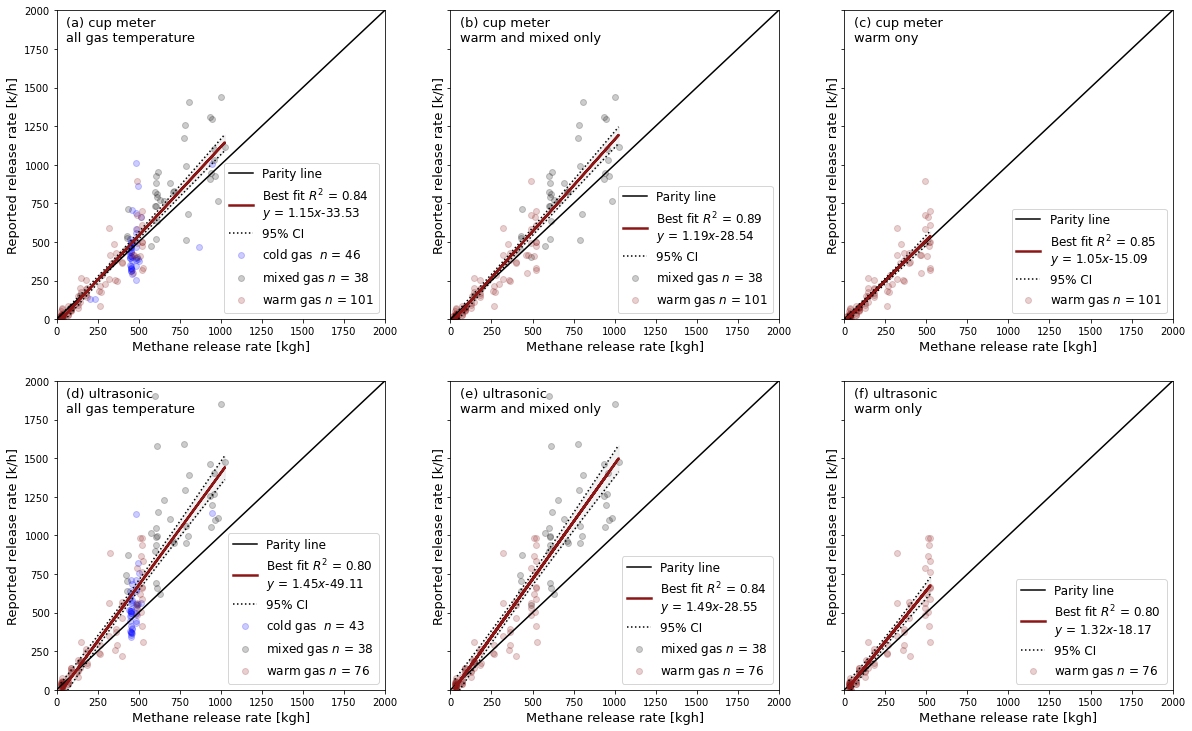

In [0]:
fig, ([[ax1,ax2,ax3],[ax4,ax5,ax6]]) = plt.subplots(2,3,figsize=[20,12.5],sharey=True)
ax1 = parity_plot_sensitivity_gas_temperature(ax1,data_selection(data,'Base','WS_windGust_logged_mps'),
                                              gas_temp=['cold','mixed','warm'])
ax2 = parity_plot_sensitivity_gas_temperature(ax2,data_selection(data,'Base','WS_windGust_logged_mps'),
                                              gas_temp=['mixed','warm'])
ax3 = parity_plot_sensitivity_gas_temperature(ax3,data_selection(data,'Base','WS_windGust_logged_mps'),
                                              gas_temp=['warm'])
ax4 = parity_plot_sensitivity_gas_temperature(ax4,data_selection(data,'Base','sonic_windGust_mps'),
                                              gas_temp=['cold','mixed','warm'])
ax5 = parity_plot_sensitivity_gas_temperature(ax5,data_selection(data,'Base','sonic_windGust_mps'),
                                              gas_temp=['mixed','warm'])
ax6 = parity_plot_sensitivity_gas_temperature(ax6,data_selection(data,'Base','sonic_windGust_mps'),
                                              gas_temp=['warm'])

# add subplot titles
ax1.annotate('(a) cup meter \nall gas temperature',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
ax2.annotate('(b) cup meter \nwarm and mixed only',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
ax3.annotate('(c) cup meter \nwarm ony',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
ax4.annotate('(d) ultrasonic \nall gas temperature',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
ax5.annotate('(e) ultrasonic \nwarm and mixed only',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
ax6.annotate('(f) ultrasonic \nwarm only',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)

fig

In [0]:
# save fig
fig.savefig(graph_dir+'KairosDetectionParitySensitivityGasTemperature'+fdate+'.pdf',format='pdf')

## wind speed

partition data into three bins based on cup wind meter 1-min gust wind speed [0.9,2), [2,3), [3,max] m/s so that the bins are similar in size

In [0]:
wind_to_use = 'WS_windGust_logged_mps'
mph_per_mps = 0.44704
plot_data = data_selection(data,'Base',wind_to_use)
a,b,c = 2*mph_per_mps,2,3
df = pd.DataFrame()
df['bins'] = ['['+str(a)+','+str(b)+') mps','['+str(b)+','+str(c)+') mps','['+str(c)+','+str(plot_data[wind_to_use].max())+'] mps']
df['size'] = np.array([plot_data[plot_data[wind_to_use]>=a].loc[plot_data[wind_to_use]<b].shape[0],
                      plot_data[plot_data[wind_to_use]>=b].loc[plot_data[wind_to_use]<c].shape[0],
                      plot_data[plot_data[wind_to_use]>=c].shape[0]])
df

,bins,size
0,"[0.89408,2) mps",63
1,"[2,3) mps",59
2,"[3,6.25856] mps",63


partition data into three bins based on ultrasonic anemometer 1-min gust wind speed
[0,2.5), [2.5,3.5), [3.5,max] mph so that the bins are similar in size

In [0]:
wind_to_use = 'sonic_windGust_mps'
plot_data = data_selection(data,'Base',wind_to_use)
a,b,c = 0,2.5,3.5
df = pd.DataFrame()
df['bins'] = ['['+str(a)+','+str(b)+') mps','['+str(b)+','+str(c)+') mps','['+str(c)+','+str(plot_data[wind_to_use].max())+'] mps']
df['size'] = np.array([plot_data[plot_data[wind_to_use]>=a].loc[plot_data[wind_to_use]<b].shape[0],
                      plot_data[plot_data[wind_to_use]>=b].loc[plot_data[wind_to_use]<c].shape[0],
                      plot_data[plot_data[wind_to_use]>=c].shape[0]])
df

,bins,size
0,"[0,2.5) mps",47
1,"[2.5,3.5) mps",55
2,"[3.5,6.720011139072] mps",55


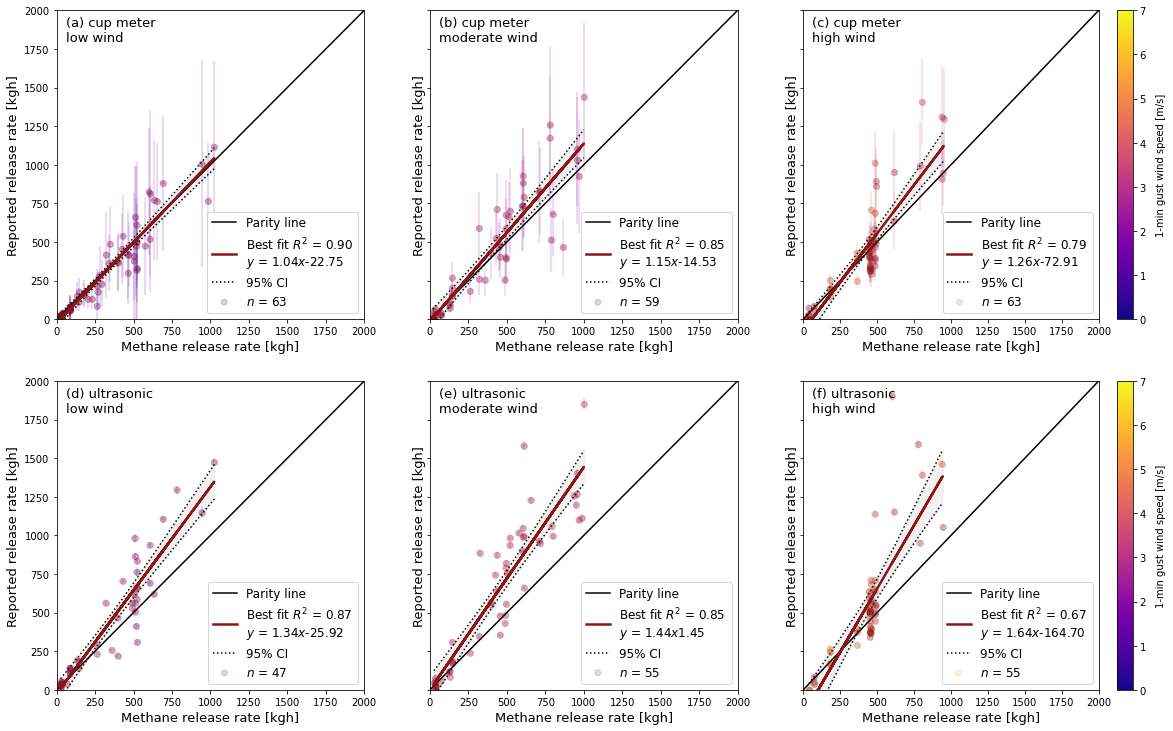

In [0]:
from matplotlib.cm import ScalarMappable
cmap = plt.cm.get_cmap('plasma')
max_wind=7

fig, ([[ax1,ax2,ax3],[ax4,ax5,ax6]]) = plt.subplots(2,3,figsize=[20,12.5],sharey=True,gridspec_kw={'width_ratios': [1, 1, 1.2]})
wind_to_use = 'WS_windGust_logged_mps'
ax1 = parity_plot_sensitivity_wind_speed(ax1,data_selection(data,'Base',wind_to_use),wind_to_use,
                                         2*mph_per_mps,2,max_wind,force_intercept_origin=0)
ax2 = parity_plot_sensitivity_wind_speed(ax2,data_selection(data,'Base',wind_to_use),wind_to_use,
                                         2,3,max_wind,force_intercept_origin=0)
ax3 = parity_plot_sensitivity_wind_speed(ax3,data_selection(data,'Base',wind_to_use),wind_to_use,
                                         3,np.inf,max_wind,force_intercept_origin=0)
wind_to_use = 'sonic_windGust_mps'
ax4 = parity_plot_sensitivity_wind_speed(ax4,data_selection(data,'Base',wind_to_use),wind_to_use,
                                         0,2.5,max_wind,force_intercept_origin=0)
ax5 = parity_plot_sensitivity_wind_speed(ax5,data_selection(data,'Base',wind_to_use),wind_to_use,
                                         2.5,3.5,max_wind,force_intercept_origin=0)
ax6 = parity_plot_sensitivity_wind_speed(ax6,data_selection(data,'Base',wind_to_use),wind_to_use,
                                         3.5,np.inf,max_wind,force_intercept_origin=0)

# add subplot titles
ax1.annotate('(a) cup meter \nlow wind',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
ax2.annotate('(b) cup meter \nmoderate wind',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
ax3.annotate('(c) cup meter \nhigh wind',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
ax4.annotate('(d) ultrasonic \nlow wind',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
ax5.annotate('(e) ultrasonic \nmoderate wind',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
ax6.annotate('(f) ultrasonic \nhigh wind',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)

# add color map
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(0,max_wind))
cbar = plt.colorbar(sm,ax=ax3)
cbar.set_label('1-min gust wind speed [m/s]', rotation=90,labelpad=10,fontsize=10)
cbar = plt.colorbar(sm,ax=ax6)
cbar.set_label('1-min gust wind speed [m/s]', rotation=90,labelpad=10,fontsize=10)
plt.close()

fig

In [0]:
# save fig
fig.savefig(graph_dir+'KairosDetectionParitySensitivityWindSpeed'+fdate+'.pdf',format='pdf')

# heteroskedasticity

In [0]:
base_case_data = data_selection(data,'Base','WS_windGust_logged_mps')
x = base_case_data.CH4_release_kgh.values
y = base_case_data.closest_plume_quantification_kgh.fillna(0).values

## HC std error
Heteroscedasticity-consistent (HC) standard errors are used to allow the fitting of a model that does contain heteroscedastic residuals. \
While the OLS point estimator remains unbiased, it is not "best" in the sense of having minimum mean square error, and the OLS variance estimator does not provide a consistent estimate of the variance of the OLS estimates. The solution is to find a heteroscedasticity-consistent estimator (HCE) for variance. \
https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors \
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html  \
Four such estimators are:
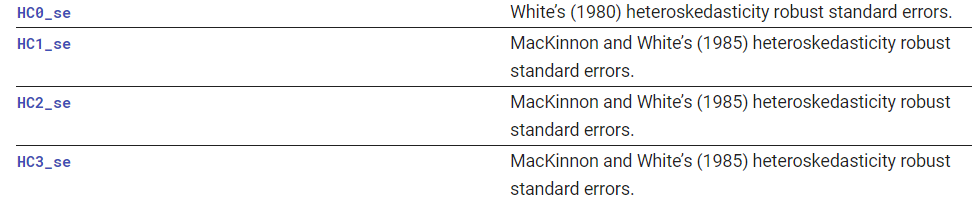

In [0]:
import statsmodels.api as sm
from statsmodels.regression import linear_model

t = sm.add_constant(x, prepend=False)     # specify an intercept
mod_ols = sm.OLS(y, t)
res_ols_simple = mod_ols.fit()
print(res_ols_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     962.1
Date:                Thu, 28 May 2020   Prob (F-statistic):           8.67e-75
Time:                        01:22:50   Log-Likelihood:                -1170.6
No. Observations:                 185   AIC:                             2345.
Df Residuals:                     183   BIC:                             2352.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1488      0.037     31.018      0.0

In [0]:
# change the HC code here to find the value of the four HC std error estimators
mod_ols = sm.OLS(y, t)
res_ols_heteroskadesticity_consistent = mod_ols.fit(cov_type='HC0')
print(res_ols_heteroskadesticity_consistent.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     616.9
Date:                Thu, 28 May 2020   Prob (F-statistic):           1.62e-60
Time:                        01:22:52   Log-Likelihood:                -1170.6
No. Observations:                 185   AIC:                             2345.
Df Residuals:                     183   BIC:                             2352.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1488      0.046     24.838      0.0

In [0]:
# compare parameters and standard errors
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
mod_ols = sm.OLS(y, t)
res_ols_HC0 = mod_ols.fit(cov_type='HC0')
res_ols_HC1 = mod_ols.fit(cov_type='HC1')
res_ols_HC2 = mod_ols.fit(cov_type='HC2')
res_ols_HC3 = mod_ols.fit(cov_type='HC3')
# slope = np.vstack([,[res_ols_HC0.params[0]],[res_ols_HC1.params[0]],[res_ols_HC2.params[0]],[res_ols_HC3.params[0]])
se = np.vstack([np.reshape([res_ols_simple.params, res_ols_simple.bse],[1,4]), 
                np.reshape([res_ols_HC0.params, res_ols_simple.HC0_se],[1,4]),
                np.reshape([res_ols_HC1.params, res_ols_simple.HC1_se],[1,4]),
                np.reshape([res_ols_HC2.params, res_ols_simple.HC2_se],[1,4]),
                np.reshape([res_ols_HC3.params, res_ols_simple.HC3_se],[1,4])
                ])
se = np.round(se,3)
colnames = ['slope','intercept','std_err_slope', 'std_err_intercept']
rownames = ['OLS', 'OLS_HC0', 'OLS_HC1', 'OLS_HC3', 'OLS_HC3']
tabl = SimpleTable(se, colnames, rownames, txt_fmt=default_txt_fmt)
print(tabl)

        slope intercept std_err_slope std_err_intercept
-------------------------------------------------------
OLS     1.149   -33.533         0.037            16.737
OLS_HC0 1.149   -33.533         0.046            10.904
OLS_HC1 1.149   -33.533         0.047            10.963
OLS_HC3 1.149   -33.533         0.047            11.031
OLS_HC3 1.149   -33.533         0.047            11.161
-------------------------------------------------------


## percent residual

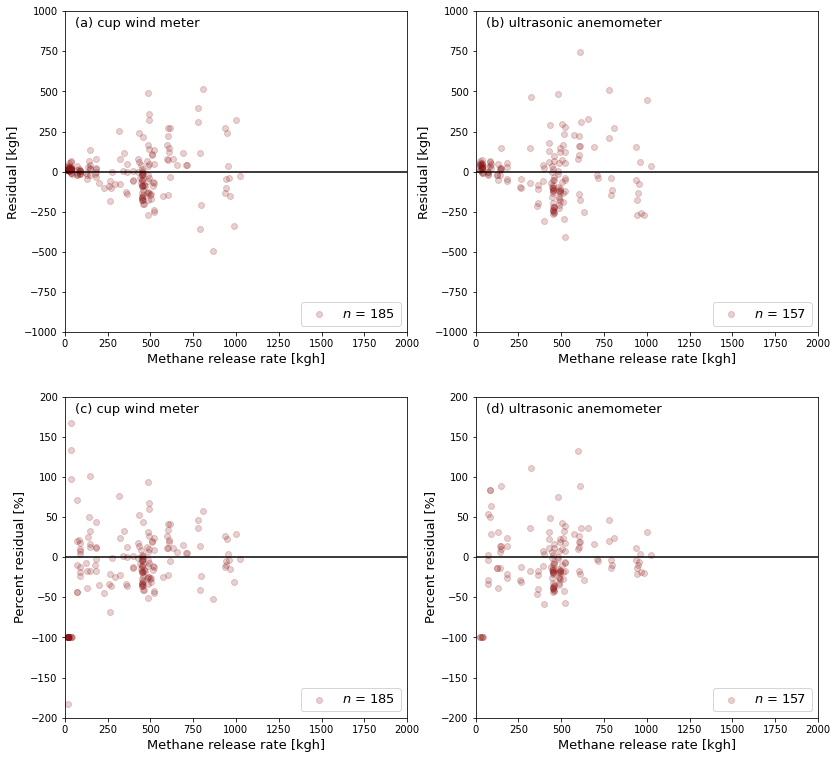

In [0]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2,figsize=[13.5,13])
ax1.set_xlabel('Methane release rate [kgh]',fontsize=13),ax1.set_ylabel('Residual [kgh]',fontsize=13)
ax2.set_xlabel('Methane release rate [kgh]',fontsize=13),ax2.set_ylabel('Residual [kgh]',fontsize=13)
ax3.set_xlabel('Methane release rate [kgh]',fontsize=13),ax3.set_ylabel('Percent residual [%]',fontsize=13)
ax4.set_xlabel('Methane release rate [kgh]',fontsize=13),ax4.set_ylabel('Percent residual [%]',fontsize=13)
plot_xlim = [0,2000]
ax1.set_xlim(plot_xlim), ax2.set_xlim(plot_xlim), ax3.set_xlim(plot_xlim), ax4.set_xlim(plot_xlim)
ax1.set_ylim([-1000,1000]), ax2.set_ylim([-1000,1000])
ax3.set_ylim([-200,200]), ax4.set_ylim([-200,200])

ax1.annotate('(a) cup wind meter',xy=(0.03,0.95),xycoords = 'axes fraction',fontsize=13)
ax2.annotate('(b) ultrasonic anemometer',xy=(0.03,0.95),xycoords = 'axes fraction',fontsize=13)
ax3.annotate('(c) cup wind meter',xy=(0.03,0.95),xycoords = 'axes fraction',fontsize=13)
ax4.annotate('(d) ultrasonic anemometer',xy=(0.03,0.95),xycoords = 'axes fraction',fontsize=13)

# cup wind meter
wind_to_use = 'WS_windGust_logged_mps'
plot_data = data_selection(data,'Base',wind_to_use)
x = plot_data.CH4_release_kgh
y = plot_data.closest_plume_quantification_kgh.fillna(0).values
n,pearson_corr,slope,intercept,r_value,x_lim,y_pred,lower_CI,upper_CI,lower_PI,upper_PI,residual,std_err = linreg_results(x,y)
ax1.scatter(x,residual,c='#8c1515',alpha = 0.2,label='$n$ = %d' %(n))   # residual plot
y_pred = intercept+x*slope
percent_residual = residual/y_pred*100
ax3.scatter(x,percent_residual,c='#8c1515',alpha=0.2,label='$n$ = %d' %(n))  # percent residual plot

# ultrasonic anemometer
wind_to_use = 'sonic_windGust_mps'
plot_data = data_selection(data,'Base',wind_to_use)
x = plot_data.CH4_release_kgh
y = plot_data.closest_plume_quantification_kgh.fillna(0).values
n,pearson_corr,slope,intercept,r_value,x_lim,y_pred,lower_CI,upper_CI,lower_PI,upper_PI,residual,std_err = linreg_results(x,y)
ax2.scatter(x,residual,c='#8c1515',alpha = 0.2,label='$n$ = %d' %(n))   # residual plot
y_pred = intercept+x*slope
percent_residual = residual/y_pred*100
ax4.scatter(x,percent_residual,c='#8c1515',alpha=0.2,label='$n$ = %d' %(n))  # percent residual plot

ax1.plot(plot_xlim,[0,0],color='k')
ax2.plot(plot_xlim,[0,0],color='k')
ax3.plot(plot_xlim,[0,0],color='k')
ax4.plot(plot_xlim,[0,0],color='k')
ax1.legend(loc='lower right',fontsize=13)
ax2.legend(loc='lower right',fontsize=13)
ax3.legend(loc='lower right',fontsize=13)
ax4.legend(loc='lower right',fontsize=13)
plt.show()

In [0]:
# save fig
fig.savefig(graph_dir+'ResidualAndPercentResidual'+fdate+'.pdf',format='pdf')

### stationarity: LOESS curve

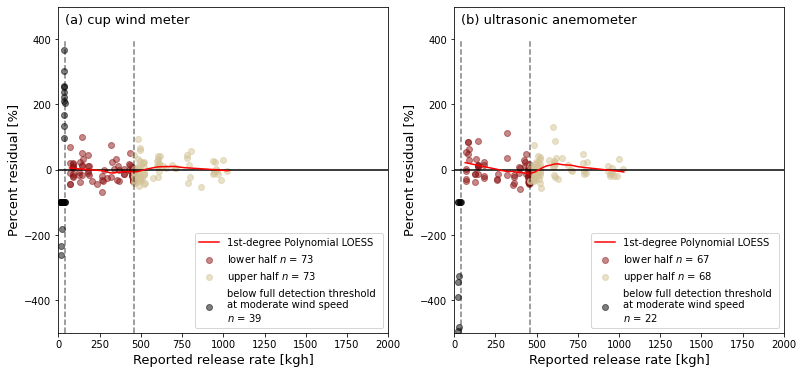

In [0]:
from github_version.functions.LOESS import *

full_detection_limit = 20   # kgh/mps

fig,[ax1,ax2] = plt.subplots(1,2,figsize=[13,6])
# fig,[ax1,ax2,ax3] = plt.subplots(1,3,figsize=[20,6])

wind_to_use = 'WS_windGust_logged_mps'
ax1 =  stationary_percent_residual(ax1,data_selection(data,'Base',wind_to_use),wind_to_use,full_detection_limit)
wind_to_use = 'sonic_windGust_mps'
ax2 =  stationary_percent_residual(ax2,data_selection(data,'Base',wind_to_use),wind_to_use,full_detection_limit)
# wind_to_use = 'darksky_windGust_mps'
# ax3 =  stationary_percent_residual(ax3,data_selection(data,'Base',wind_to_use),wind_to_use,full_detection_limit)

# add subplot titles
ax1.annotate('(a) cup wind meter',xy=[0.02,0.95],xycoords='axes fraction',fontsize=13)
ax2.annotate('(b) ultrasonic anemometer',xy=[0.02,0.95],xycoords='axes fraction',fontsize=13)
# ax3.annotate('(c) Dark Sky',xy=[0.02,0.95],xycoords='axes fraction',fontsize=13)

fig

In [0]:
# save fig
fig.savefig(graph_dir+'PercentResidualStationary'+fdate+'.pdf',format='pdf')

### percent residual distribution

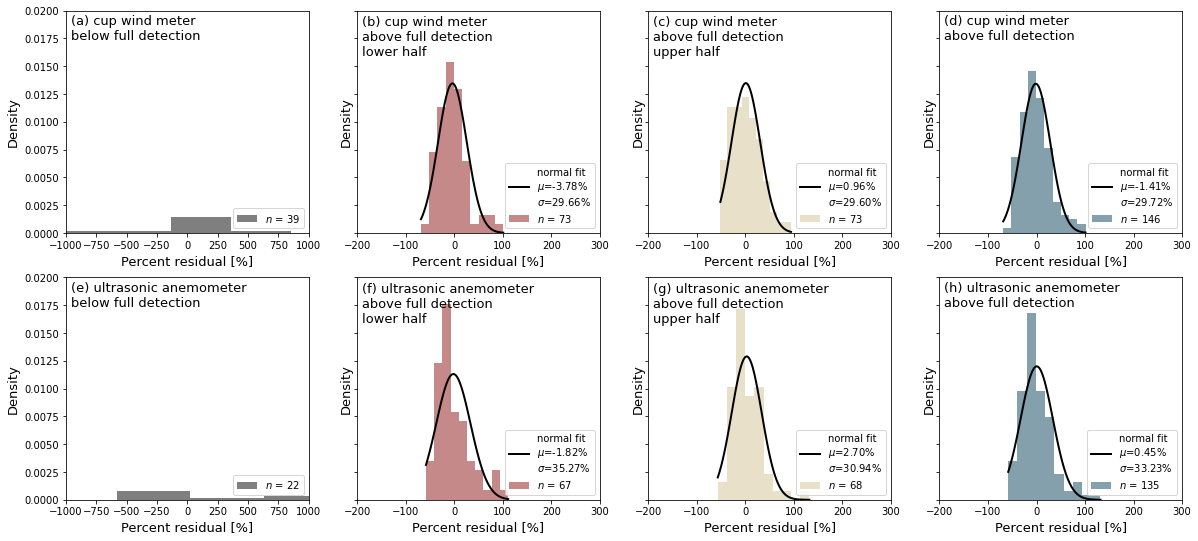

In [0]:
full_detection_limit = 20   # kgh/mps

fig,[[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8]] = plt.subplots(2,4,figsize=[20,9],sharey=True)

# cup wind meter
wind_to_use = 'WS_windGust_logged_mps'
plot_data = data_selection(data,'Base',wind_to_use)
upper_black = full_detection_limit*plot_data[wind_to_use].median()  # find upper bound for black points
x = plot_data.CH4_release_kgh.values
x = x[x>=upper_black]
upper_red = np.median(x)
ax1,_,_ = histogram_percent_residual(ax1, plot_data, 0, upper_black, hist_color='k', 
                                n_bins=5, x_lim=[-1000,1000], y_lim=[0,0.02],fit_norm=0)
ax2,_,_ = histogram_percent_residual(ax2, plot_data, upper_black, upper_red, hist_color='#8c1515', 
                                n_bins=10, x_lim=[-200,300], y_lim=[0,0.02],fit_norm=1)
ax3,_,_ = histogram_percent_residual(ax3, plot_data, upper_red, np.inf, hist_color='#D2C295', 
                                n_bins=10, x_lim=[-200,300], y_lim=[0,0.02],fit_norm=1)
ax4,_,_ = histogram_percent_residual(ax4, plot_data, upper_black, np.inf,hist_color='#09425A', 
                                n_bins=10, x_lim=[-200,300], y_lim=[0,0.02],fit_norm=1)

# ultrasonic anemometer
wind_to_use = 'sonic_windGust_mps'
plot_data = data_selection(data,'Base',wind_to_use)
upper_black = full_detection_limit*plot_data[wind_to_use].median()  # find upper bound for black points
x = plot_data.CH4_release_kgh.values
x = x[x>=upper_black]
upper_red = np.median(x)
ax5,_,_ = histogram_percent_residual(ax5, plot_data, 0, upper_black, hist_color='k', 
                                n_bins=5, x_lim=[-1000,1000], y_lim=[0,0.02],fit_norm=0)
ax6,_,_ = histogram_percent_residual(ax6, plot_data, upper_black, upper_red, hist_color='#8c1515', 
                                n_bins=10, x_lim=[-200,300], y_lim=[0,0.02],fit_norm=1)
ax7,_,_ = histogram_percent_residual(ax7, plot_data, upper_red, np.inf, hist_color='#D2C295', 
                                n_bins=10, x_lim=[-200,300], y_lim=[0,0.02],fit_norm=1)
ax8,_,_ = histogram_percent_residual(ax8, plot_data, upper_black, np.inf,hist_color='#09425A', 
                                n_bins=10, x_lim=[-200,300], y_lim=[0,0.02],fit_norm=1)

# add subplot titles
ax1.annotate('(a) cup wind meter\nbelow full detection',xy=[0.02,0.87],xycoords='axes fraction',fontsize=13)
ax2.annotate('(b) cup wind meter\nabove full detection \nlower half',xy=[0.02,0.8],xycoords='axes fraction',fontsize=13)
ax3.annotate('(c) cup wind meter\nabove full detection \nupper half',xy=[0.02,0.8],xycoords='axes fraction',fontsize=13)
ax4.annotate('(d) cup wind meter\nabove full detection',xy=[0.02,0.87],xycoords='axes fraction',fontsize=13)
ax5.annotate('(e) ultrasonic anemometer\nbelow full detection',xy=[0.02,0.87],xycoords='axes fraction',fontsize=13)
ax6.annotate('(f) ultrasonic anemometer\nabove full detection \nlower half',xy=[0.02,0.8],xycoords='axes fraction',fontsize=13)
ax7.annotate('(g) ultrasonic anemometer\nabove full detection \nupper half',xy=[0.02,0.8],xycoords='axes fraction',fontsize=13)
ax8.annotate('(h) ultrasonic anemometer\nabove full detection',xy=[0.02,0.87],xycoords='axes fraction',fontsize=13)

fig

In [0]:
# save fig
fig.savefig(graph_dir+'PercentResidualHistogram'+fdate+'.pdf',format='pdf')

### stationarity: T-test for mean

In [0]:
from scipy import stats

full_detection_limit = 20 # kgh/mps
wind_to_use = 'sonic_windGust_mps'
plot_data = data_selection(data,'Base',wind_to_use)
median_wind = plot_data[wind_to_use].median()

# regression and find residual and percent residual
x = plot_data.CH4_release_kgh.values
y = plot_data.closest_plume_quantification_kgh.fillna(0).values
n,pearson_corr,slope,intercept,r_value,x_lim,y_pred,lower_CI,upper_CI,lower_PI,upper_PI,residual,std_err = linreg_results(x,y)
y_pred = x*slope + intercept
percent_residual = residual/y_pred*100

df = pd.DataFrame({'release_rate':x, 'pct_resid':percent_residual})
below_full_detection = df[df.release_rate<full_detection_limit*median_wind]
above_full_detection = df.loc[df.release_rate>=full_detection_limit*median_wind]
above_full_detection_lowerhalf = above_full_detection.loc[above_full_detection.release_rate<above_full_detection.release_rate.median()]
above_full_detection_upperhalf = above_full_detection.loc[above_full_detection.release_rate>=above_full_detection.release_rate.median()]

# t-test
a = above_full_detection_lowerhalf.pct_resid
b = above_full_detection_upperhalf.pct_resid
t,p = stats.ttest_ind(a, b)

print('wind used is '+wind_to_use)
print('lower half mean = %.3f, std error of mean = %.3f, standard deviation = %d' %(np.mean(a),np.std(a)/np.sqrt(len(a)),np.std(a)))
print('upper half mean = %.3f, std error of mean = %.3f, standard deviation = %d' %(np.mean(b),np.std(b)/np.sqrt(len(b)),np.std(b)))
print("t = " + str(t))
print("p = " + str(p))

wind used is sonic_windGust_mps
lower half mean = -1.821, std error of mean = 4.309, standard deviation = 35
upper half mean = 2.697, std error of mean = 3.751, standard deviation = 30
t = -0.7857394437421119
p = 0.4334177322101175


### stationarity: F-test for variance

In [0]:
F = np.var(a) / np.var(b)
df_a = len(a)-1
df_b = len(b)-1
p = stats.f.cdf(F, df_a, df_b)
print("F = " + str(F))
print("p = " + str(p))

F = 1.2997504414804721
p = 0.8564226714340328


## quantile regression

In [0]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [0]:
wind_to_use = 'sonic_windGust_mps'
plot_data = data_selection(data,'Base',wind_to_use)

x = plot_data.CH4_release_kgh.values
y = plot_data.closest_plume_quantification_kgh.fillna(0).values
plot_data = pd.DataFrame({'x':x,'y':y})
mod = smf.quantreg('y ~ x', plot_data)
res = mod.fit(q=.5)
print('50% quantile line regression results')
print(res.summary())

50% quantile line regression results
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.6250
Model:                       QuantReg   Bandwidth:                       100.8
Method:                 Least Squares   Sparsity:                        295.7
Date:                Thu, 28 May 2020   No. Observations:                  157
Time:                        01:23:25   Df Residuals:                      155
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.1938     21.992     -0.873      0.384     -62.637      24.249
x              1.3121      0.045     28.940      0.000       1.223       1.402


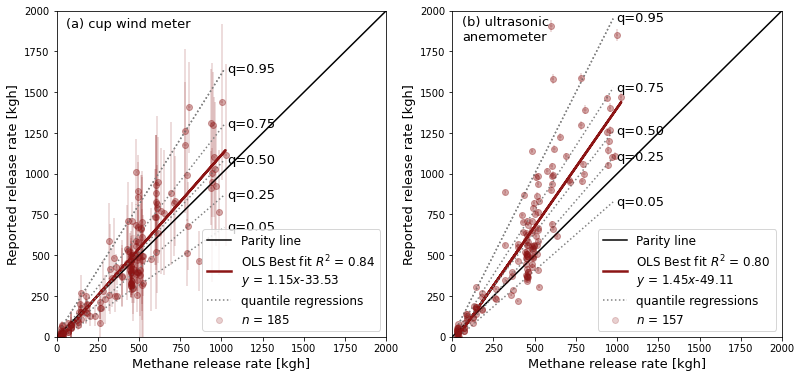

In [0]:
from github_version.functions.parity import quantile_regression_plot

fig,[ax1,ax2] = plt.subplots(1,2,figsize=[13,6])
quantiles = [0.05,0.25,0.5,0.75,0.95]
ax1 = quantile_regression_plot(ax1,data_selection(data,'Base','WS_windGust_logged_mps'),quantiles)
ax2 = quantile_regression_plot(ax2,data_selection(data,'Base','sonic_windGust_mps'),quantiles)
ax1.annotate('(a) cup wind meter',xy=[0.03,0.95],xycoords='axes fraction',fontsize=13)
ax2.annotate('(b) ultrasonic \nanemometer',xy=[0.03,0.91],xycoords='axes fraction',fontsize=13)
fig

In [0]:
# save fig
fig.savefig(graph_dir+'QuantileRegression'+fdate+'.pdf',format='pdf')

## weighted least square

In [0]:
# wind_to_use = 'sonic_windGust_mps'
wind_to_use = 'WS_windGust_logged_mps'
plot_data = data_selection(data,'Base',wind_to_use)

# exclude the data points where Kairos did not detect a plume; so that we won't incur an error bar of length zero and thus a weight of zero
plot_data = plot_data[~np.isnan(plot_data.closest_plume_quantification_kgh)]
plot_data = plot_data[plot_data.closest_plume_quantification_kgh != 0]
x = plot_data.CH4_release_kgh
y = plot_data.closest_plume_quantification_kgh

### by wind speed
assign weight to be the square of wind speed because the stronger the wind is, the smaller the wind measurement error is likely to be, and the more we are confident in the plume quantification

In [0]:
weights = np.power(plot_data[wind_to_use], 1)
t = sm.add_constant(x, prepend=False)   # add an intercept to the model
mod_wls = sm.WLS(y, t, weights=weights)
res_wls = mod_wls.fit()
print(res_wls.summary())

                                   WLS Regression Results                                   
Dep. Variable:     closest_plume_quantification_kgh   R-squared:                       0.791
Model:                                          WLS   Adj. R-squared:                  0.790
Method:                               Least Squares   F-statistic:                     625.8
Date:                              Thu, 28 May 2020   Prob (F-statistic):           4.93e-58
Time:                                      01:23:41   Log-Likelihood:                -1083.1
No. Observations:                               167   AIC:                             2170.
Df Residuals:                                   165   BIC:                             2176.
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                      coef    std err          t      P>|t|      [0.02

### by proportionality
Assuming a fixed percent residual, the error should grow proportionally with release size.

In [0]:
weights = np.power(y,-1)
t = sm.add_constant(x, prepend=False)   # add an intercept to the model
mod_wls = sm.WLS(y, t, weights=weights)
res_wls = mod_wls.fit()
print(res_wls.summary())

                                   WLS Regression Results                                   
Dep. Variable:     closest_plume_quantification_kgh   R-squared:                       0.886
Model:                                          WLS   Adj. R-squared:                  0.885
Method:                               Least Squares   F-statistic:                     1280.
Date:                              Thu, 28 May 2020   Prob (F-statistic):           1.19e-79
Time:                                      01:23:42   Log-Likelihood:                -1000.4
No. Observations:                               167   AIC:                             2005.
Df Residuals:                                   165   BIC:                             2011.
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                      coef    std err          t      P>|t|      [0.02

### by error bar length
For the ultrasonic anemometer, the length of the error bar is always 2% of the plume quantification value in kg/h; for the cup wind meter, the length of the error bar is (2 mph)*(wind_normalized_quantification mcfd/mph).
Assign weight to be the inverse of error bar length to some power

In [0]:
power = -2
y_error_bar = plot_data.quantification_upper_error_kgh
weights = np.power(y_error_bar,power)
t = sm.add_constant(x, prepend=False)   # add an intercept to the model
mod_wls = sm.WLS(y, t, weights=weights)
res_wls = mod_wls.fit()
print(res_wls.summary())

                                   WLS Regression Results                                   
Dep. Variable:     closest_plume_quantification_kgh   R-squared:                       0.881
Model:                                          WLS   Adj. R-squared:                  0.880
Method:                               Least Squares   F-statistic:                     1221.
Date:                              Thu, 28 May 2020   Prob (F-statistic):           3.78e-78
Time:                                      01:23:43   Log-Likelihood:                -1002.1
No. Observations:                               167   AIC:                             2008.
Df Residuals:                                   165   BIC:                             2014.
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                      coef    std err          t      P>|t|      [0.02

In [0]:
power = -1
y_error_bar = plot_data.quantification_upper_error_kgh
weights = np.power(y_error_bar,power)
t = sm.add_constant(x, prepend=False)   # add an intercept to the model
mod_wls = sm.WLS(y, t, weights=weights)
res_wls = mod_wls.fit()
print(res_wls.summary())

                                   WLS Regression Results                                   
Dep. Variable:     closest_plume_quantification_kgh   R-squared:                       0.882
Model:                                          WLS   Adj. R-squared:                  0.881
Method:                               Least Squares   F-statistic:                     1234.
Date:                              Thu, 28 May 2020   Prob (F-statistic):           1.71e-78
Time:                                      01:23:43   Log-Likelihood:                -1013.1
No. Observations:                               167   AIC:                             2030.
Df Residuals:                                   165   BIC:                             2037.
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                      coef    std err          t      P>|t|      [0.02

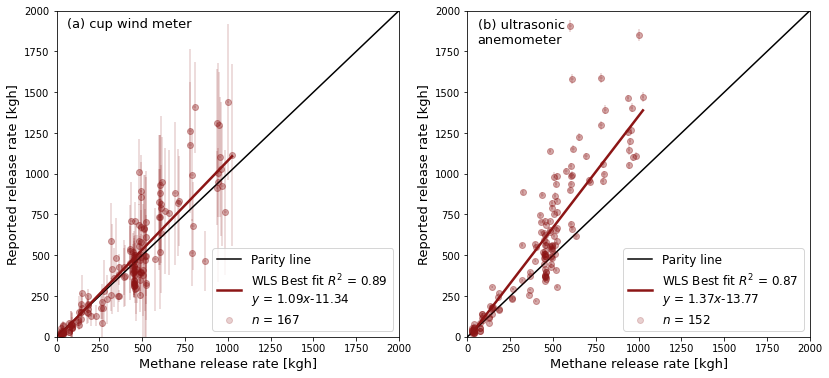

In [0]:
from github_version.functions.parity import WLS_plot

# w = 'quantification_upper_error_kgh'
w = 'CH4_release_kgh'
power = -1
# plot_interval = ['WLS prediction']
plot_interval = []
force_intercept_origin = 0

fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13.5,6])
# fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=[21,6])
ax1 = WLS_plot(ax1, data_selection(data,'Base','WS_windGust_logged_mps'),
               w,power,force_intercept_origin,plot_interval)
ax2 = WLS_plot(ax2, data_selection(data,'Base','sonic_windGust_mps'),
               w,power,force_intercept_origin,plot_interval)
# ax3 = WLS_plot(ax3, data_selection(data,'Base','darksky_windGust_mps'))
ax1.annotate('(a) cup wind meter',xy=[0.03,0.95],xycoords='axes fraction',fontsize=13)
ax2.annotate('(b) ultrasonic \nanemometer',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
# ax3.annotate('(c) Dark Sky \n1-min gust',xy=[0.03,0.9],xycoords='axes fraction',fontsize=13)
fig

In [0]:
# save fig
fig.savefig(graph_dir+'WLSon'+w+fdate+'.pdf',format='pdf')

## summary statistics

In [0]:
mod_ols = sm.OLS(y, t)
res_ols = mod_ols.fit()
res_ols_HC0 = mod_ols.fit(cov_type='HC0')
res_ols_HC1 = mod_ols.fit(cov_type='HC1')
res_ols_HC2 = mod_ols.fit(cov_type='HC2')
res_ols_HC3 = mod_ols.fit(cov_type='HC3')

se = np.vstack([np.reshape([res_wls.params,res_wls.bse],[1,4]),
                np.reshape([res_ols.params, res_ols.bse],[1,4]), 
                np.reshape([res_ols_HC0.params, res_ols_simple.HC0_se],[1,4]),
                np.reshape([res_ols_HC1.params, res_ols_simple.HC1_se],[1,4]),
                np.reshape([res_ols_HC2.params, res_ols_simple.HC2_se],[1,4]),
                np.reshape([res_ols_HC3.params, res_ols_simple.HC3_se],[1,4])
                ])
se = np.round(se,3)
colnames = ['slope','intercept','stderr_slope', 'stderr_intercept']
rownames = ['WLS', 'OLS', 'OLS_HC0', 'OLS_HC1', 'OLS_HC3', 'OLS_HC3']
tabl = SimpleTable(se, colnames, rownames, txt_fmt=default_txt_fmt)
print('wind used is '+wind_to_use)
print(tabl)

wind used is WS_windGust_logged_mps
        slope intercept stderr_slope stderr_intercept
-----------------------------------------------------
WLS     1.033   -14.348        0.029            7.094
OLS     1.154   -36.265        0.043           20.355
OLS_HC0 1.154   -36.265        0.046           10.904
OLS_HC1 1.154   -36.265        0.047           10.963
OLS_HC3 1.154   -36.265        0.047           11.031
OLS_HC3 1.154   -36.265        0.047           11.161
-----------------------------------------------------


# wind

In [0]:
from github_version.functions.wind import *
wind_data = pd.read_excel(folder_name+'Stanford_Kairos_controlled_release_2019_studyData.xlsx',sheet_name='MINUTELY_WIND',skiprows=0)
sonic_secondly_data = pd.read_excel(folder_name+'Stanford_Kairos_controlled_release_2019_studyData.xlsx',sheet_name='SECONDLY_ULTRASONIC_WIND',skiprows=0)
KSCK_hourly_data = pd.read_excel(folder_name+'Stanford_Kairos_controlled_release_2019_studyData.xlsx',sheet_name='HOURLY_KSCK_WIND',skiprows=0)
HRRR_hourly_data = pd.read_excel(folder_name+'Stanford_Kairos_controlled_release_2019_studyData.xlsx',sheet_name='HOURLY_HRRR_WIND',skiprows=0)

In [0]:
# convert from the 16-rose wind direction to radiian
wind_compass = ['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW']
WS_direction_converted = np.empty(wind_data.shape[0])
i=0
for d in wind_data.WS_direction:
  if d in wind_compass:
    WS_direction_converted[i] = convert_16_wind_compass_to_radian(d)
  i+=1
wind_data.WS_direction = WS_direction_converted

In [0]:
# convert from mph to mps
wind_data = convert_to_wind_metric(wind_data)
KSCK_hourly_data = convert_to_wind_metric(KSCK_hourly_data)

In [0]:
# keep relevant columns
KSCK_hourly_data = KSCK_hourly_data[['date','minute','minute','unix_time','KSCK_windSpeed_mps']]
HRRR_hourly_data = HRRR_hourly_data[['date','minute','minute','unix_time','HRRR_windGust_27avg_mps']]

In [0]:
# apply a height adjustement factor to the 10-meter Dark Sky wind and NOAA wind to align with the cup wind meter and ultrasonic anemmeter measurememnts taken at 2.5 meter (8 feet)
HA_factor = (2.5/10)**0.15    # height adjustment factor assuming a power law vertical wind profile
wind_data = height_adjust(wind_data, HA_factor)
KSCK_hourly_data = height_adjust(KSCK_hourly_data, HA_factor)
KSCK_hourly_data = height_adjust(KSCK_hourly_data, HA_factor)

## parity between instruments

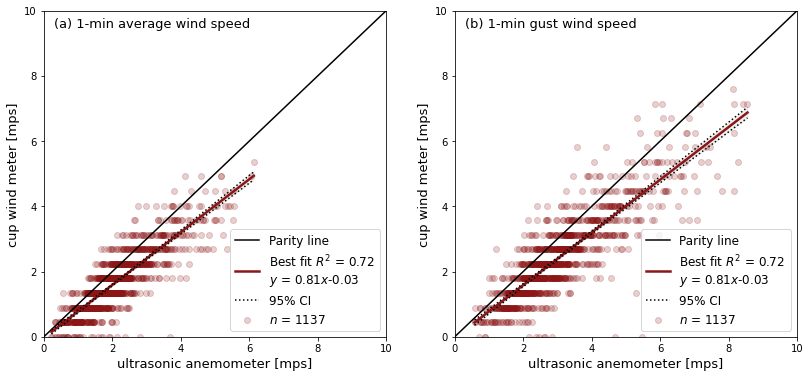

In [0]:
from github_version.functions.wind import wind_parity_plot
fig,(ax1,ax2) = plt.subplots(1,2,figsize=[13.5,6])
ax1 = wind_parity_plot(ax1, wind_data,
                       windx='sonic_windSpeed_mps',windy='WS_windSpeed_mps')
ax2 = wind_parity_plot(ax2, wind_data,
                       windx='sonic_windGust_mps',windy='WS_windGust_mps')
ax1.annotate('(a) 1-min average wind speed',xy=[0.03,0.95],xycoords='axes fraction',fontsize=13)
ax2.annotate('(b) 1-min gust wind speed',xy=[0.03,0.95],xycoords='axes fraction',fontsize=13)
fig

In [0]:
# save fig
fig.savefig(graph_dir+'WindParity'+fdate+'.pdf',format='pdf')

## parity with NOAA winds

In [0]:
from github_version.functions.wind import compute_hourly_avg_wind
KSCK_hourly_wind_data = compute_hourly_avg_wind(wind_data,KSCK_hourly_data)
HRRR_hourly_wind_data = compute_hourly_avg_wind(wind_data,HRRR_hourly_data)
# hourly_wind_data.columns

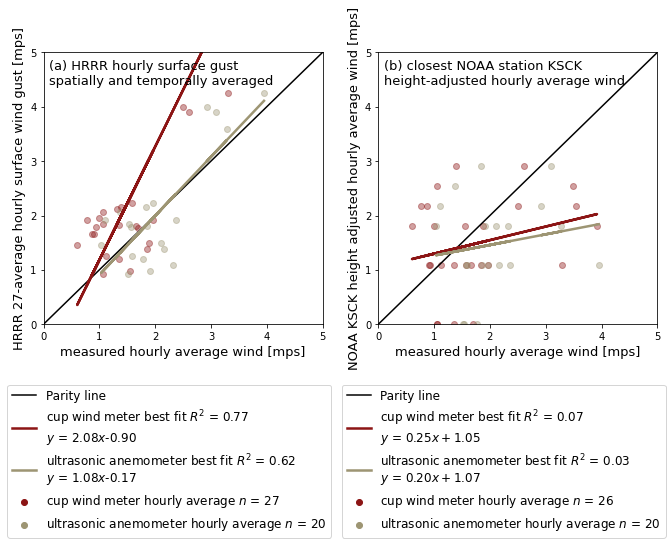

In [0]:
from github_version.functions.wind import wind_parity_with_NOAA_plot
fig,[ax1,ax2] = plt.subplots(1,2,figsize=[11,5])
ax1 = wind_parity_with_NOAA_plot(ax1,HRRR_hourly_wind_data,
                                 ylabel='HRRR 27-average hourly surface wind gust [mps]',
                                 windy='HRRR_windGust_27avg_mps')
ax2 = wind_parity_with_NOAA_plot(ax2,KSCK_hourly_wind_data,
                                 ylabel='NOAA KSCK height adjusted hourly average wind [mps]',
                                 windy='KSCK_windSpeed_height_adjusted_mps')
ax1.annotate('(a) HRRR hourly surface gust\nspatially and temporally averaged',
            xy=[0.02,0.88],xycoords='axes fraction',fontsize=13)
ax2.annotate('(b) closest NOAA station KSCK\nheight-adjusted hourly average wind',
            xy=[0.02,0.88],xycoords='axes fraction',fontsize=13)
fig

In [0]:
# save fig
fig.savefig(graph_dir+'WindParityWithNOAA'+fdate+'.pdf',format='pdf')

## parity with darksky

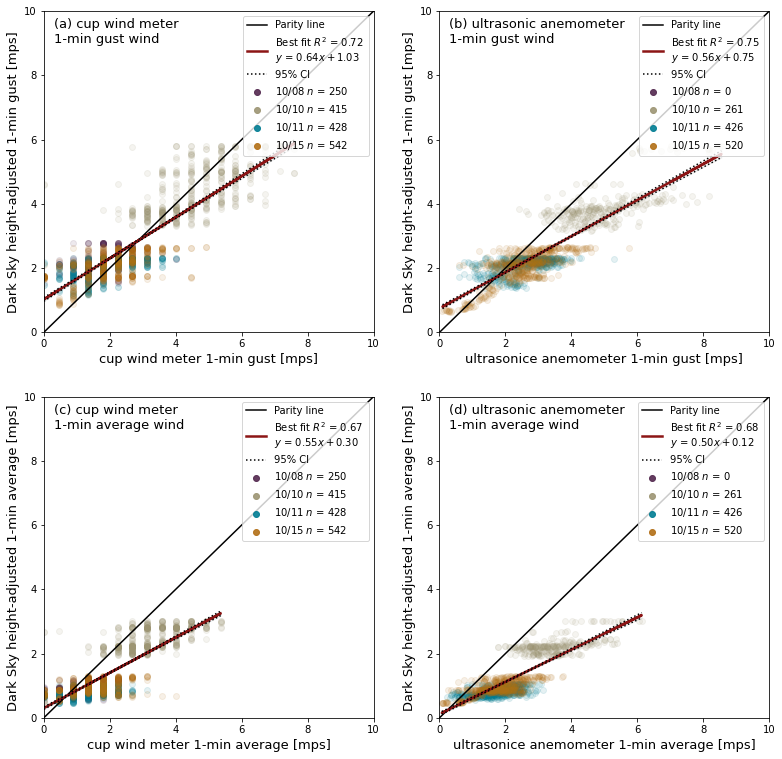

In [0]:
from github_version.functions.wind import wind_parity_with_darksky_plot
fig,[[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2,figsize=[13,13])
ax1 = wind_parity_with_darksky_plot(ax1, wind_data,
                                    windx='WS_windGust_mps',windy='darksky_windGust_height_adjusted_mps',
                                    xlabel='cup wind meter 1-min gust [mps]',
                                    ylabel='Dark Sky height-adjusted 1-min gust [mps]',
                                    legend_loc='upper right')
ax2 = wind_parity_with_darksky_plot(ax2, wind_data,
                                    windx='sonic_windGust_mps',windy='darksky_windGust_height_adjusted_mps',
                                    xlabel='ultrasonice anemometer 1-min gust [mps]',
                                    ylabel='Dark Sky height-adjusted 1-min gust [mps]',
                                    legend_loc='upper right')
ax3 = wind_parity_with_darksky_plot(ax3, wind_data,
                                    windx='WS_windSpeed_mps',windy='darksky_windSpeed_height_adjusted_mps',
                                    xlabel='cup wind meter 1-min average [mps]',
                                    ylabel='Dark Sky height-adjusted 1-min average [mps]',
                                    legend_loc='upper right')
ax4 = wind_parity_with_darksky_plot(ax4, wind_data,
                                    windx='sonic_windSpeed_mps',windy='darksky_windSpeed_height_adjusted_mps',
                                    xlabel='ultrasonice anemometer 1-min average [mps]',
                                    ylabel='Dark Sky height-adjusted 1-min average [mps]',
                                    legend_loc='upper right')

ax1.annotate('(a) cup wind meter\n1-min gust wind',xy=(0.03,0.9),xycoords = 'axes fraction',fontsize=13)
ax2.annotate('(b) ultrasonic anemometer \n1-min gust wind',xy=(0.03,0.9),xycoords = 'axes fraction',fontsize=13)
ax3.annotate('(c) cup wind meter\n1-min average wind',xy=(0.03,0.9),xycoords = 'axes fraction',fontsize=13)
ax4.annotate('(d) ultrasonic anemometer\n1-min average wind',xy=(0.03,0.9),xycoords = 'axes fraction',fontsize=13)

fig

In [0]:
# save fig
fig.savefig(graph_dir+'WindParityWithDarkSky'+fdate+'.pdf',format='pdf')

## choice of HRRR wind

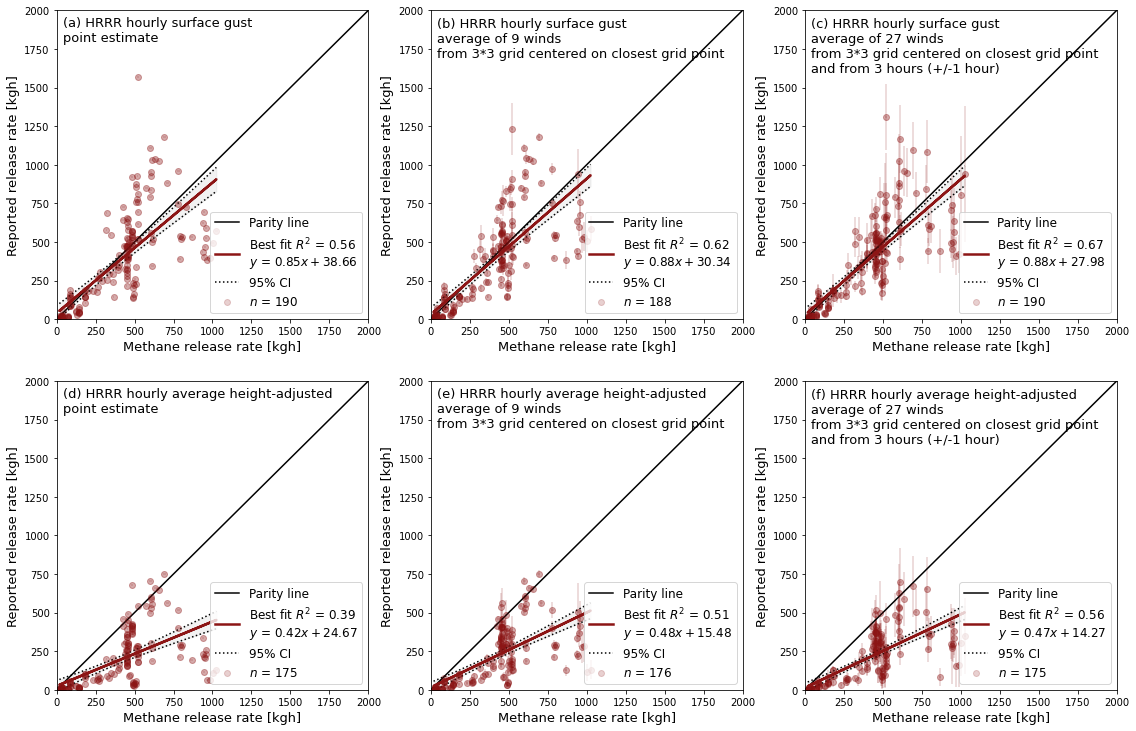

In [0]:
fig, [[ax1,ax2,ax3],[ax4,ax5,ax6]]= plt.subplots(2,3,figsize=[19,12.5])
ax1 = parity_plot(ax1, data_selection(data,'Base','HRRR_windGust_CC_mps'))
ax2 = parity_plot(ax2, data_selection(data,'Base','HRRR_windGust_9avg_mps'))
ax3 = parity_plot(ax3, data_selection(data,'Base','HRRR_windGust_27avg_mps'))
ax4 = parity_plot(ax4 ,data_selection(data,'Base','HRRR_windSpeed_CC_mps'))
ax5 = parity_plot(ax5 ,data_selection(data,'Base','HRRR_windSpeed_9avg_mps'))
ax6 = parity_plot(ax6 ,data_selection(data,'Base','HRRR_windSpeed_27avg_mps'))
ax1.annotate('(a) HRRR hourly surface gust\npoint estimate',xy=[0.02,0.9],xycoords='axes fraction',fontsize=13)
ax2.annotate('(b) HRRR hourly surface gust\naverage of 9 winds \nfrom 3*3 grid centered on closest grid point',
             xy=[0.02,0.85],xycoords='axes fraction',fontsize=13)
ax3.annotate('(c) HRRR hourly surface gust\naverage of 27 winds \nfrom 3*3 grid centered on closest grid point\nand from 3 hours (+/-1 hour)',
             xy=[0.02,0.8],xycoords='axes fraction',fontsize=13)
ax4.annotate('(d) HRRR hourly average height-adjusted\npoint estimate',xy=[0.02,0.9],xycoords='axes fraction',fontsize=13)
ax5.annotate('(e) HRRR hourly average height-adjusted\naverage of 9 winds \nfrom 3*3 grid centered on closest grid point',
             xy=[0.02,0.85],xycoords='axes fraction',fontsize=13)
ax6.annotate('(f) HRRR hourly average height-adjusted\naverage of 27 winds \nfrom 3*3 grid centered on closest grid point\nand from 3 hours (+/-1 hour)',
             xy=[0.02,0.8],xycoords='axes fraction',fontsize=13)
fig

In [0]:
# save fig
fig.savefig(graph_dir+'HRRRWindChoice'+fdate+'.pdf',format='pdf')

## choice of KSCK wind

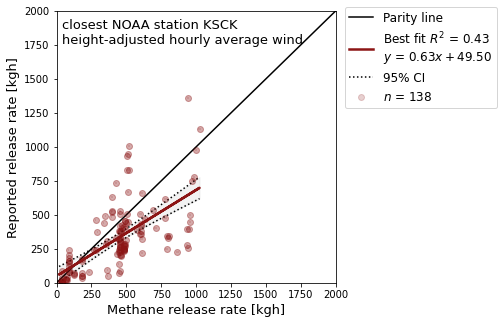

In [0]:
fig,ax = plt.subplots(1,1,figsize=[5,5])
ax = parity_plot(ax, data_selection(data,'Base','KSCK_windSpeed_mps'))
ax.annotate('closest NOAA station KSCK\nheight-adjusted hourly average wind',
            xy=[0.02,0.88],xycoords='axes fraction',fontsize=13)
fig

In [0]:
# save fig
fig.savefig(graph_dir+'KSCKWindChoice'+fdate+'.pdf',format='pdf')

## daily variability

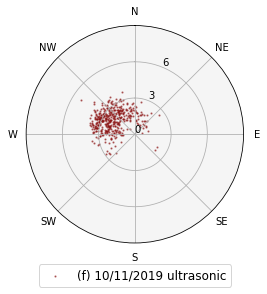

In [0]:
from github_version.functions.wind import daily_wind_scatter
fig = plt.figure(figsize=(4,4))
# ax = daily_wind_scatter(wind_data,'a','10/08/2019','WS_windGust_mps','WS_direction')
# ax = daily_wind_scatter(wind_data,'b','10/10/2019','WS_windGust_mps','WS_direction')
# ax = daily_wind_scatter(wind_data,'c','10/11/2019','WS_windGust_mps','WS_direction')
# ax = daily_wind_scatter(wind_data,'d','10/15/2019','WS_windGust_mps','WS_direction')
# ax = daily_wind_scatter(wind_data,'e','10/10/2019','sonic_windGust_mps','sonic_direction')
ax = daily_wind_scatter(wind_data,'f','10/11/2019','sonic_windGust_mps','sonic_direction')
# ax = daily_wind_scatter(wind_data,'g','10/15/2019','sonic_windGust_mps','sonic_direction')

## trial variability

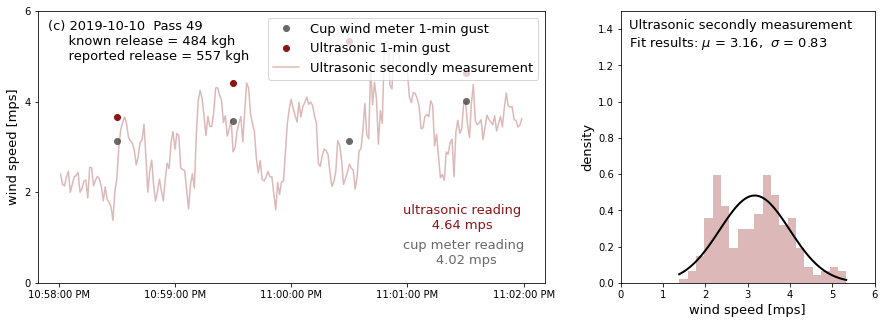

In [0]:
from github_version.functions.wind import wind_speed_variability_plot
# wind_speed_variability_plot(data,wind_data,sonic_secondly_data,109,'a')
# wind_speed_variability_plot(data,wind_data,sonic_secondly_data,120,'b')
wind_speed_variability_plot(data,wind_data,sonic_secondly_data,97,'c')
# wind_speed_variability_plot(data,wind_data,sonic_secondly_data,198,'d')

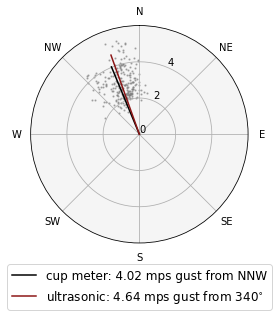

In [0]:
from github_version.functions.wind import wind_direction_variability_plot
fig = plt.figure(figsize=(4,4))
# wind_direction_variability_plot(data,sonic_secondly_data,109)
# wind_direction_variability_plot(data,sonic_secondly_data,120)
wind_direction_variability_plot(data,sonic_secondly_data,97)
# wind_direction_variability_plot(data,sonic_secondly_data,198)
plt.show()

# flow variability

In [0]:
flow_data = pd.read_excel('drive/My Drive/'+root_path+'Stanford_Kairos_controlled_release_2019_studyData.xlsx',
                          sheet_name='FLOW_READINGS')

In [0]:
# drop any row that has a meter reading below 1000 scfh, because some readings are read wrong
for i in range(flow_data.shape[0]):
  if flow_data.mid_meter_flow_scfh[i]<1500:
    flow_data.mid_meter_flow_scfh[i] = np.nan    

# define data for plots
flow_data_large = flow_data.loc[flow_data.unix_time>1571146680].loc[flow_data.unix_time<=1571147280].reset_index()
for i in range(flow_data_large.shape[0]):
  # drop the data points that are obviously read wrong with Google text detection
  if flow_data_large.mid_meter_flow_scfh[i]<10000 or flow_data_large.mid_meter_flow_scfh[i] > 20000:
    flow_data_large.mid_meter_flow_scfh[i] = np.nan

flow_data_mid = flow_data.loc[flow_data.unix_time>1571150880].loc[flow_data.unix_time<=1571151480].reset_index()
for i in range(flow_data_mid.shape[0]):
  if flow_data_mid.mid_meter_flow_scfh[i]<7000 or flow_data_mid.mid_meter_flow_scfh[i] > 10000:
    flow_data_mid.mid_meter_flow_scfh[i] = np.nan

flow_data_small = flow_data.loc[flow_data.unix_time>1571139470].loc[flow_data.unix_time<=1571140070].reset_index()
for i in range(flow_data_small.shape[0]):
  if flow_data_small.mid_meter_flow_scfh[i]<1950 or flow_data_small.mid_meter_flow_scfh[i] > 2080:
    flow_data_small.mid_meter_flow_scfh[i] = np.nan

In [0]:
from github_version.functions.flow_meter import flow_variability_plot

# fig_large_flow = flow_variability_plot(flow_data_large,'a',[17300,17800])
# fig_mid_flow = flow_variability_plot(flow_data_mid,'b',[8450,8950])
fig_small_flow = flow_variability_plot(flow_data_small,'c',[1750,2250])
fig_large_flow

In [0]:
# save fig
fig_large_flow.savefig(graph_dir+'FlowMeterVariability17000scfh'+fdate+'.pdf',format='pdf')
fig_mid_flow.savefig(graph_dir+'FlowMeterVariability8000scfh'+fdate+'.pdf',format='pdf')
fig_small_flow.savefig(graph_dir+'FlowMeterVariability2000scfh'+fdate+'.pdf',format='pdf')

# save functions and graphs
Run the following cells to save graphs and functions. Even if the main ipynb is saved, the changes made to the functions and the graphs generated will be lost if these cells are not executed.

In [0]:
import os
folder_to_save = os.path.join('drive/My Drive/', root_path)

In [0]:
# save functions
files_to_save = [folder_name + 'functions/data_processing.py',
                 folder_name + 'functions/min_detection.py',
                 folder_name + 'functions/parity.py',
                 folder_name + 'functions/LOESS.py',
                 folder_name + 'functions/wind.py',
                 folder_name + 'functions/flow_meter.py']

for files in files_to_save:
  with open(os.path.join(folder_to_save, '/'.join(files.split('/')[1:])), 'w') as f:
    f.write(''.join(open(files).readlines()))